In [31]:
!ls

camera_callibration.py	marker_detection.py   __pycache__
feature_extractor.py	objloader_simple.py   square_detection.py
main.py			projection_matrix.py  test.ipynb


In [38]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim


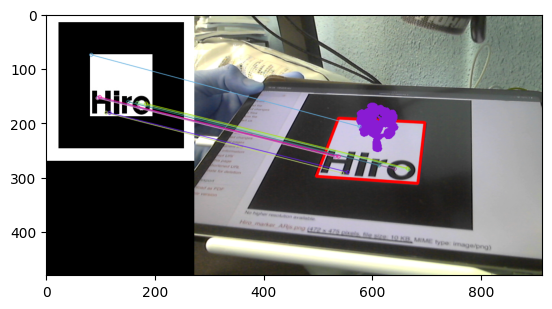

In [61]:
import cv2

# Read images
target_image = cv2.imread('../img/hiro.jpg')
reference_image = cv2.imread('../img/norm_screenshot_20.01.2024.png')

# Convert images to grayscale
target_gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)
reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints_target, descriptors_target = orb.detectAndCompute(target_gray, None)
keypoints_reference, descriptors_reference = orb.detectAndCompute(reference_gray, None)

# Create a Brute-Force matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors_target, descriptors_reference)

# Sort matches by their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw top matches
matched_image = cv2.drawMatches(target_image, keypoints_target, reference_image, keypoints_reference, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched image
# cv2.imshow('Matched Image', matched_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(matched_image)
plt.show()


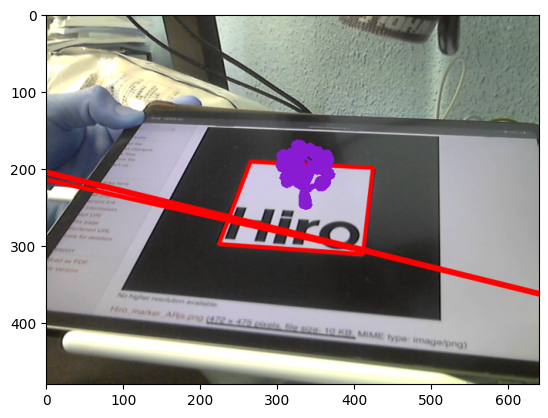

In [62]:

target_point = np.float32([keypoints_target[match.queryIdx].pt for match in matches[:10]]).reshape(-1, 1, 2)
ref_point = np.float32([keypoints_reference[match.trainIdx].pt for match in matches[:10]]).reshape(-1, 1, 2)

homography, _ = cv2.findHomography( target_point, ref_point, cv2.RANSAC, 5.0)


ref_w ,ref_h= target_image.shape[:2]
ref_point2 = [[0,0], [0, ref_h-1], [ref_w-1, ref_h-1], [ref_w-1,0]]
ref_point2 = np.float32(ref_point).reshape(-1,1,2)
transformedCorners = cv2.perspectiveTransform(ref_point2, homography)

# Draw a polygon on the second image joining the transformed corners
frame = cv2.polylines(
    reference_image, [np.int32(transformedCorners)], True, 255, 3, cv2.LINE_AA,
)
# Draw a polygon on the second image joining the transformed corners
# frame = cv2.polylines(
#     target_image, [np.int32(transformedCorners)], True, 255, 3, cv2.LINE_AA,
#     )
# cv2.imshow("image", frame)
# cv2.imshow("iamge", aligned_image)
plt.imshow(frame)
plt.show()

In [63]:
# Compute reprojection error
def compute_reprojection_error(homography, points1, points2):
    # Transform points using homography
    projected_points = cv2.perspectiveTransform(points1, homography)
    print(projected_points.shape)
    print(points2.shape)
    
    # Calculate Euclidean distance between projected points and actual points
    errors = np.sqrt(np.sum((projected_points - points2)**2, axis=2))
    
    # Compute mean reprojection error
    mean_error = np.mean(errors)
    
    return mean_error


In [64]:
print(compute_reprojection_error(homography, target_point, ref_point))

(10, 1, 2)
(10, 1, 2)
15.285347


Normalized Cross-correlation: 0.5193835496902466
(0.5221041440963745, 0.7244998812675476, (29, 290), (69, 58))


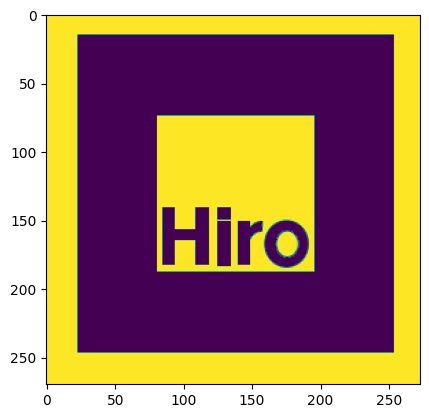

In [50]:
ref2 = cv2.imread("../img/Face.jpg")
ref2 = cv2.cvtColor(ref2, cv2.COLOR_BGR2GRAY)
correlation = cv2.matchTemplate(target_gray, reference_gray, cv2.TM_CCORR_NORMED)
correlation2 = cv2.matchTemplate(target_gray, ref2, cv2.TM_CCORR_NORMED)
max_corr = cv2.minMaxLoc(correlation)[1]

print("Normalized Cross-correlation:", max_corr)
print(cv2.minMaxLoc(correlation2))

plt.imshow(target_gray)
plt.show()

In [65]:
a = [[[0,0,0,0], [12,3,4], [2,12]]]

for i,b,c,d in enumerate(a):
    print(b)
    print(c)
    print(d)
    print(i)

[0, 0, 0, 0]
[12, 3, 4]
[2, 12]
